# Ford GoBike Recommendations
Ford GoBike is interested in deciding what kinds of promotions to offer through its mobile app. The focus is on commuter trips because those likely contribute the most revenue to the company and, if new customers are generated, they will likely yield consistent revenue for a longer period of time because they will 1) sign up for longer subscriptions and 2) need the service on a daily basis.

This short report is broken into 2 main sections. 1) An exploration of the data to find answers to key questions and 2) recommendations based on the exploration.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Exploring the data

### What are commuter trips?
First, we explore how we will define a commuter trip. Commuter trips are likely to happen in the few hours before 9am and the hours around 5pm, but let's check in the data to make sure this is the case.

In [77]:
# Extract the number of trips by day-hour
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000 'SELECT EXTRACT(DAYOFWEEK FROM start_date) DAY_OF_WEEK, EXTRACT(HOUR FROM start_date) HOUR, COUNT(*) num_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY DAY_OF_WEEK, HOUR' > trips_by_day_hour.csv


Waiting on bqjob_r4f6ad27a6985d09c_000001619c5bb69b_1 ... (0s) Current status: DONE   

In [2]:
# check the results
trips_by_day_hour=pd.read_csv('trips_by_day_hour.csv')
trips_by_day_hour.head()
print (trips_by_day_hour['DAY_OF_WEEK'].unique())

[1 2 3 4 5 6 7]


Text(35.7514,0.5,u'Number of Trips')

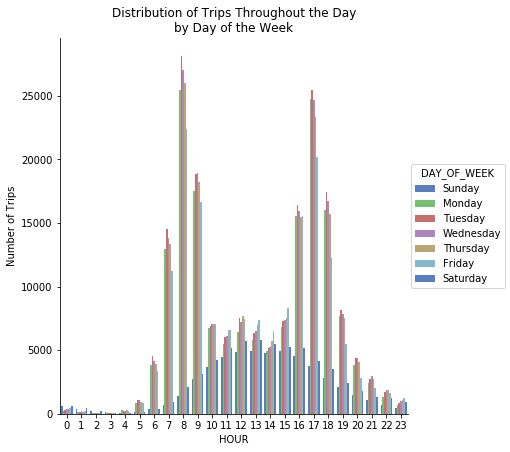

In [5]:
# map the day of week number to text day and make a grouped column chart
di = {1: "Sunday",
     2: "Monday",
     3: "Tuesday",
     4: "Wednesday",
     5: "Thursday",
     6: "Friday",
     7: "Saturday",
     }
trips_by_day_hour['DAY_OF_WEEK'].replace(di, inplace=True)
sns.factorplot(x="HOUR", y="num_trips", hue="DAY_OF_WEEK",
              data=trips_by_day_hour, kind="bar", size=6,
              palette="muted")
plt.title('Distribution of Trips Throughout the Day\nby Day of the Week')
plt.ylabel('Number of Trips')

6 hours clearly stand out on weekdays. From 7am to 9:59am and from 4pm to 6:59pm on weekdays are the busiest hours. This confirms our intuition about when commuter trips occur. We can define commuter trips as trips on weekdays during these hours.

### What are the most popular trips that you would call "commuter trips"?
Now that we have a definition of commuter trips, we can look into which of those trips are most popular.

In [80]:
# Extract the top 20 trips in weekday mornings and evenings during commuter times
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000 'SELECT start_station_id, end_station_id, start_station_name, end_station_name, COUNT(*) num_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE EXTRACT(HOUR FROM start_date) IN(7,8,9,16,17,18) AND EXTRACT(DAYOFWEEK FROM start_date) BETWEEN 2 and 6 GROUP BY start_station_id, end_station_id, start_station_name, end_station_name ORDER BY COUNT(*) DESC LIMIT 100' > popular_commuter_trips.csv


Waiting on bqjob_r14c7287b3740221c_000001619c5bc8af_1 ... (0s) Current status: DONE   

In [81]:
# check the results
pop_trips=pd.read_csv('popular_commuter_trips.csv')
pop_trips.head(30)

,start_station_id,end_station_id,start_station_name,end_station_name,num_trips
0,61,50,2nd at Townsend,Harry Bridges Plaza (Ferry Building),5165
1,50,61,Harry Bridges Plaza (Ferry Building),2nd at Townsend,5127
2,69,65,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,5040
3,60,74,Embarcadero at Sansome,Steuart at Market,4904
4,51,70,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),4756
5,70,50,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building),4689
6,74,61,Steuart at Market,2nd at Townsend,4632
7,55,70,Temporary Transbay Terminal (Howard at Beale),San Francisco Caltrain (Townsend at 4th),4584
8,74,70,Steuart at Market,San Francisco Caltrain (Townsend at 4th),4509
9,65,69,Townsend at 7th,San Francisco Caltrain 2 (330 Townsend),4258


Example popular trips:
<img src="poptrip1.png">
<img src="poptrip2.png">

It appears many of the commuter trips are short rides between other means of transportation. A number of the stations involved in the most popular trips are CalTrain, Ferry, or BART stations. This seems to indicate that the most common commuter trips are supplemental commuter bike rides after/before taking another means of transportation. This makes sense to me because these CalTrain, Ferry, or BART stops may not be close enough to the workplace for someone to walk.

### What kinds of passes to commuters have
Before we decide what kind of passes we want to offer to commuters, we should see what passes they most commonly use.

In [82]:
! bq query --use_legacy_sql=FALSE 'SELECT subscriber_type, count(*) num_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE EXTRACT(HOUR FROM start_date) IN(7,8,9,16,17,18) AND EXTRACT(DAYOFWEEK FROM start_date) BETWEEN 2 and 6 GROUP BY subscriber_type'

Waiting on bqjob_rbcd6e2728540359_000001619c5bd43a_1 ... (0s) Current status: DONE   
+-----------------+-----------+
| subscriber_type | num_trips |
+-----------------+-----------+
| Customer        |     30812 |
| Subscriber      |    529871 |
+-----------------+-----------+


As expected, most commuters are subscribers and would likely be more interested in day passes or annual memberships.

### How long are the trips that commuters usually take?
It is important to know how long the bike rides are that comutters take because the maximum length of rides for day passes is 30 minutes. We don't expect rides to be longer than that (given that a lot of rides come from / go to another, faster form of public transportation, which should not be more than 30 minutes away), but it is important to check.

In [83]:
# Extract histogram of length of trips
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000 'SELECT TIMESTAMP_DIFF(end_date, start_date, MINUTE) Minutes, COUNT(*) num_trips FROM  `bigquery-public-data.san_francisco.bikeshare_trips` WHERE EXTRACT(DAYOFWEEK FROM start_date) BETWEEN 2 AND 6 AND EXTRACT(HOUR FROM start_date) IN(7,8,9,16,17,18) GROUP BY Minutes ORDER BY Minutes' > trip_lengths.csv


Waiting on bqjob_r44f0e2f48bcaea40_000001619c5bdf4c_1 ... (0s) Current status: DONE   

Text(0.5,1,'Histogram of Length of Trip\nNote Higher values of minutes are cut off')

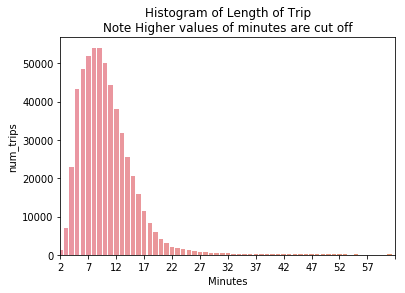

In [84]:
# check the results
trip_lengths=pd.read_csv('trip_lengths.csv')
ax=sns.barplot(x="Minutes", y="num_trips", data=trip_lengths)
ax.set_xlim(0,60)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.set(xticklabels=[2]+[2 + 5 * x for x in range(12)])
ax.set_title("Histogram of Length of Trip\nNote Higher values of minutes are cut off")


It appears that shorter rides are much more common. The distribution shows a long positive tail, but nearly all the rides are less than 30 minutes and a majority are even less than 15 minutes. 

## Recommendations
The most common commuter trips originate or end at a public transit station. Additionally, nearly all commuters are subscribers. Thus, a good promotion might aim to reduce the cost of subscriptions for those who are already commuting via public transit. For example, maybe you could offer a discount on annual subscriptions to people that already have a Clipper Card (which commuters can use for the ferry, CalTrain, and BART already). 

San Francisco is [ranked second worst by commute time](http://kron4.com/2017/10/30/study-san-francisco-ranks-among-top-5-us-cities-for-worst-commute-time-stress/) among cities in the US so marketing promotion could be targeted as a way to make a long commute easier. Discount codes for the mobile app could also be advertised on the ferry, CalTrain, and BART. 